# <center>Pedestrian detection visualization demo</center >

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os

from vis_tools import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### set file path

In [30]:
ROOT = "../"
caffemodel = os.path.join(ROOT, 'output/faster_rcnn_end2end/voc_2007_trainval/eth/vgg16_faster_rcnn_iter_70000.caffemodel')
prototxt = os.path.join(ROOT, 'models/pascal_voc/VGG16/faster_rcnn_end2end/test.prototxt')
im_file = os.path.join(ROOT, 'data/demo/000001.jpg')

check_file_path(caffemodel)
check_file_path(prototxt)
check_file_path(im_file)

### load  detection model

In [31]:
net = load_model(caffemodel, prototxt, gpu_mode=True, gpu_id=0)


Loaded network ../output/faster_rcnn_end2end/voc_2007_trainval/eth/vgg16_faster_rcnn_iter_70000.caffemodel


### run detection

Detection took 0.521s for 2000 object proposals


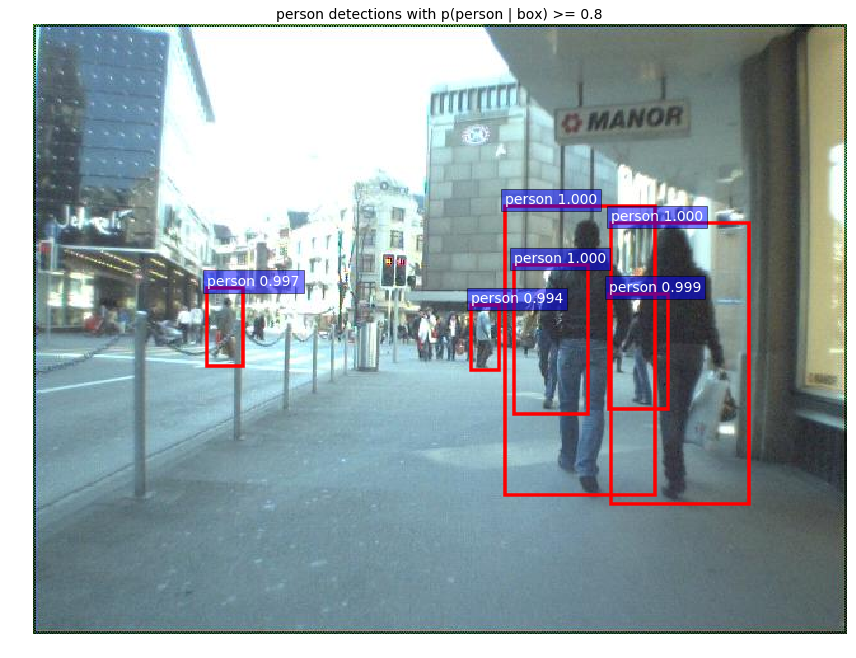

In [32]:
conf_thresh = 0.8
net = detect_image(net, im_file, conf_thresh, vis_result=True)

### print all layers information

In [33]:
# storage features
[(k, v.data.shape) for k, v in net.blobs.items()]
[(k, v[0].data.shape) for k, v in net.params.items()]
# print layers info
for layer_name, param in net.params.items():
    print("layer: {}, weights shape: {}, bias shape: {}".format(
        layer_name, str(param[0].data.shape), str(param[1].data.shape)))

for layer_name, blob in net.blobs.items():
    print("layer: {}, feature data shape: {}".format(
        layer_name, str(blob.data.shape)))

layer: conv1_1, weights shape: (64, 3, 3, 3), bias shape: (64,)
layer: conv1_2, weights shape: (64, 64, 3, 3), bias shape: (64,)
layer: conv2_1, weights shape: (128, 64, 3, 3), bias shape: (128,)
layer: conv2_2, weights shape: (128, 128, 3, 3), bias shape: (128,)
layer: conv3_1, weights shape: (256, 128, 3, 3), bias shape: (256,)
layer: conv3_2, weights shape: (256, 256, 3, 3), bias shape: (256,)
layer: conv3_3, weights shape: (256, 256, 3, 3), bias shape: (256,)
layer: conv4_1, weights shape: (512, 256, 3, 3), bias shape: (512,)
layer: conv4_2, weights shape: (512, 512, 3, 3), bias shape: (512,)
layer: conv4_3, weights shape: (512, 512, 3, 3), bias shape: (512,)
layer: conv5_1, weights shape: (512, 512, 3, 3), bias shape: (512,)
layer: conv5_2, weights shape: (512, 512, 3, 3), bias shape: (512,)
layer: conv5_3, weights shape: (512, 512, 3, 3), bias shape: (512,)
layer: rpn_conv/3x3, weights shape: (512, 512, 3, 3), bias shape: (512,)
layer: rpn_cls_score, weights shape: (18, 512, 1, 1

### visualize weights

conv1_1 layers filters, size: 64, channels: 3, width: 3, height: 3


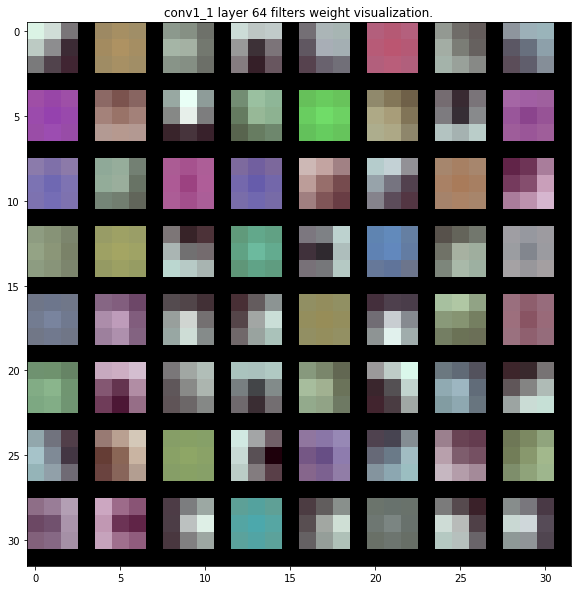

conv2_1 layers filters, size: 128, channels: 64, width: 3, height: 3


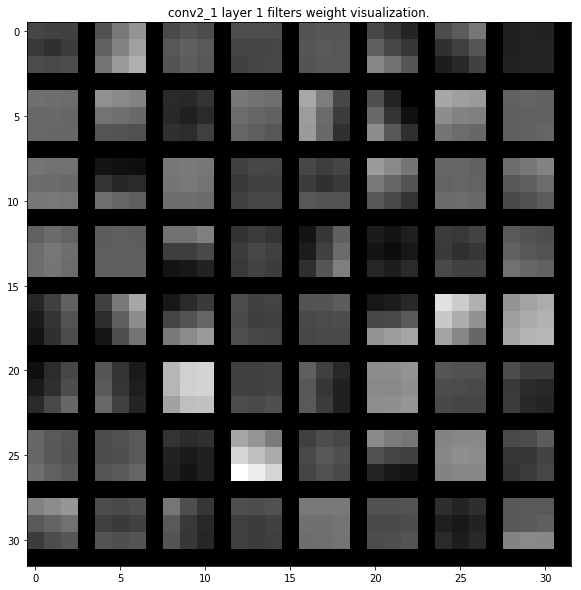

In [34]:
vis_weights(net, 'conv1_1', 64, padsize=1, padval=0)
vis_weights(net, 'conv2_1', 1, padsize=1, padval=0)

### visualize features

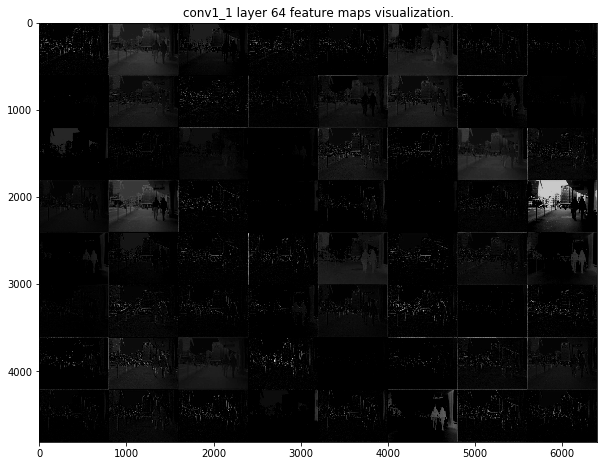

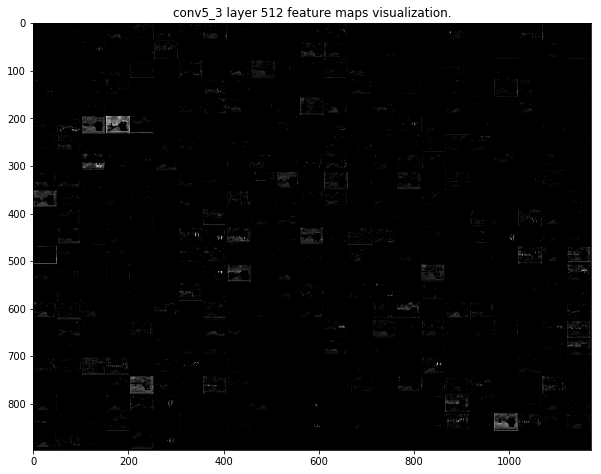

In [35]:
vis_features(net, 'conv1_1',64, padsize=1, padval=0)
vis_features(net, 'conv5_3',512, padsize=1, padval=0)

### visualize fc

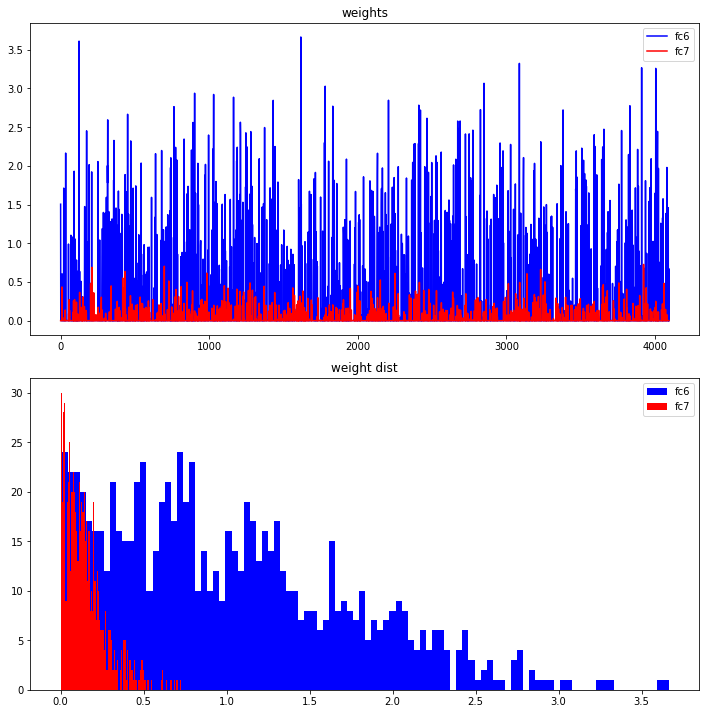

In [39]:
fig = plt.figure()

ax = fig.add_subplot(2, 1, 1)
ax.set_title('weights')

bx = fig.add_subplot(2, 1, 2)
bx.set_title('weight dist')

# set interval for subplot
plt.tight_layout(1)

feat = net.blobs['fc6'].data[0]
ax.plot(feat.flat, color='blue', label='fc6')

_ = bx.hist(feat.flat[feat.flat > 0], bins=100, color='blue', label='fc6')

feat = net.blobs['fc7'].data[0]
ax.plot(feat.flat, color='red', label='fc7')

_ = bx.hist(feat.flat[feat.flat > 0], bins=100, color='red', label='fc7')

ax.legend(loc='best')
bx.legend(loc='best')